# Symbolic Computation
Symbolic computation deals with symbols, representing them exactly, instead of numerical approximations (floating point). 

We will start with the following [borrowed](https://docs.sympy.org/latest/tutorial/intro.html) tutorial to introduce the concepts of SymPy. Devito uses SymPy heavily and builds upon it in its DSL. 

In [1]:
import math

math.sqrt(3)

1.7320508075688772

In [2]:
math.sqrt(8)

2.8284271247461903

$\sqrt(8) = 2\sqrt(2)$, but it's hard to see that here

In [3]:
import sympy
sympy.sqrt(3)

sqrt(3)

SymPy can even simplify symbolic computations

In [4]:
sympy.sqrt(8)

2*sqrt(2)

In [5]:
from sympy import symbols
x, y = symbols('x y')
expr = x + 2*y
expr


x + 2*y

Note that simply adding two symbols creates an expression. Now let's play around with it. 

In [6]:
expr + 1

x + 2*y + 1

In [7]:
expr - x

2*y

Note that `expr - x` was not `x + 2y -x`

In [8]:
x*expr

x*(x + 2*y)

In [9]:
from sympy import expand, factor
expanded_expr = expand(x*expr)
expanded_expr

x**2 + 2*x*y

In [10]:
factor(expanded_expr)

x*(x + 2*y)

In [11]:
from sympy import diff, sin, exp

diff(sin(x)*exp(x), x)

exp(x)*sin(x) + exp(x)*cos(x)

In [12]:
from sympy import limit

limit(sin(x)/x, x, 0)

1

### Exercise

Solve $x^2 - 2 = 0$ using sympy.solve

In [13]:
# Type solution here
from sympy import solve

## Pretty printing

In [14]:
from sympy import init_printing, Integral, sqrt

init_printing(use_latex='mathjax')

In [15]:
Integral(sqrt(1/x), x)

⌠           
⎮     ___   
⎮    ╱ 1    
⎮   ╱  ─  dx
⎮ ╲╱   x    
⌡           

In [16]:
from sympy import latex

latex(Integral(sqrt(1/x), x))

'\\int \\sqrt{\\frac{1}{x}}\\, dx'

More symbols.
Exercise: fix the following piece of code

In [17]:
# NBVAL_SKIP
# The following piece of code is supposed to fail as it is
# The exercise is to fix the code

expr2 = x + 2*y +3*z

NameError: name 'z' is not defined

### Exercise 

Solve $x + 2*y + 3*z$ for $x$

In [18]:
# Solution here
from sympy import solve

Difference between symbol name and python variable name

In [19]:
x, y = symbols("y z")

In [20]:
x

y

In [21]:
y

z

In [22]:
# NBVAL_SKIP
# The following code will error until the code in cell 16 above is
# fixed
z

NameError: name 'z' is not defined

Symbol names can be more than one character long

In [23]:
crazy = symbols('unrelated')

crazy + 1

unrelated + 1

In [24]:
x = symbols("x")
expr = x + 1
x = 2

What happens when I print expr now? Does it print 3?

In [25]:
print(expr)

x + 1


How do we get 3?

In [26]:
x = symbols("x")
expr = x + 1
expr.subs(x, 2)

3

## Equalities

In [27]:
x + 1 == 4

False

In [28]:
from sympy import Eq

Eq(x + 1, 4)

x + 1 = 4

Suppose we want to ask whether $(x + 1)^2 = x^2 + 2x + 1$

In [29]:
(x + 1)**2 == x**2 + 2*x + 1

False

In [30]:
from sympy import simplify

a = (x + 1)**2
b = x**2 + 2*x + 1

simplify(a-b)

0

### Exercise 
Write a function that takes two expressions as input, and returns a tuple of two booleans. The first if they are equal symbolically, and the second if they are equal mathematically.

## More operations

In [31]:
z = symbols("z")
expr = x**3 + 4*x*y - z
expr.subs([(x, 2), (y, 4), (z, 0)])

36

In [32]:
from sympy import sympify

str_expr = "x**2 + 3*x - 1/2"
expr = sympify(str_expr)
expr

 2         1
x  + 3⋅x - ─
           2

In [33]:
expr.subs(x, 2)

19/2

In [34]:
expr = sqrt(8)

In [35]:
expr

2⋅√2

In [36]:
expr.evalf()

2.82842712474619

In [37]:
from sympy import pi

pi.evalf(50)

3.1415926535897932384626433832795028841971693993751

In [38]:
from sympy import cos

expr = cos(2*x)
expr.evalf(subs={x: 2.4})

0.0874989834394464

### Exercise


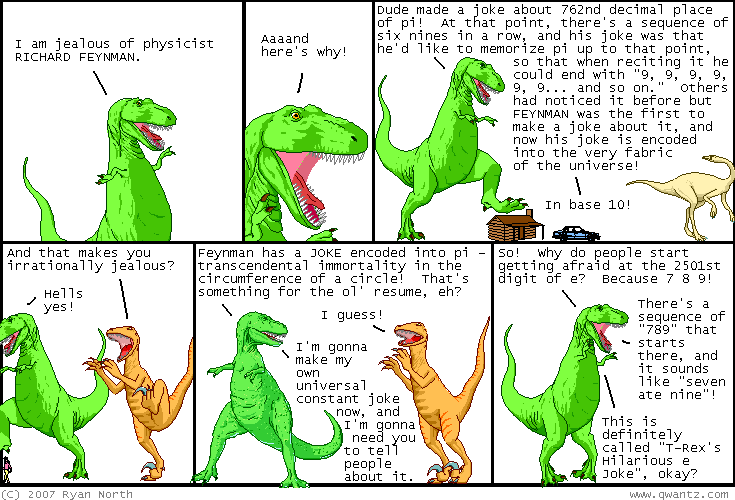

In [39]:
from IPython.core.display import Image 
Image(filename='figures/comic.png') 

Write a function that takes a symbolic expression (like pi), and determines the first place where 789 appears.
Tip: Use the string representation of the number. Python starts counting at 0, but the decimal point offsets this

## Solving an ODE

In [40]:
from sympy import Function

f, g = symbols('f g', cls=Function)
f(x)

f(x)

In [41]:
f(x).diff()

d       
──(f(x))
dx      

In [42]:
diffeq = Eq(f(x).diff(x, x) - 2*f(x).diff(x) + f(x), sin(x))
diffeq

                     2                
         d          d                 
f(x) - 2⋅──(f(x)) + ───(f(x)) = sin(x)
         dx           2               
                    dx                

In [43]:
from sympy import dsolve

dsolve(diffeq, f(x))

                    x   cos(x)
f(x) = (C₁ + C₂⋅x)⋅ℯ  + ──────
                          2   

## Finite Differences

In [44]:

f = Function('f')
dfdx = f(x).diff(x)
dfdx.as_finite_difference()

-f(x - 1/2) + f(x + 1/2)

In [45]:
from sympy import Symbol

d2fdx2 = f(x).diff(x, 2)
h = Symbol('h')
d2fdx2.as_finite_difference(h)

  2⋅f(x)   f(-h + x)   f(h + x)
- ────── + ───────── + ────────
     2         2           2   
    h         h           h    

Now that we have seen some relevant features of vanilla SymPy, let's move on to Devito, which could be seen as SymPy finite differences on steroids!